In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import time
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np

In [61]:
x1 = np.array([ 2, 5, 7])
x2 = np.array([ 1, 4, 9])

y = np.array([ 3, 2, 1])

In [62]:
all_ones = np.ones(x1.shape[0])
X = np.array([all_ones, x1, x2]).T

In [63]:
X.shape

(3, 3)

In [64]:
X

array([[1., 2., 1.],
       [1., 5., 4.],
       [1., 7., 9.]])

In [65]:
def solve_normal_equation(X, y):
    try:
        theta = np.linalg.inv(X.T @ X) @ X.T @ y
        return theta
    except np.linalg.LinAlgError:
        print('The matrix is singular')
        print("X.T @ X = \n", X.T @ X)
        return None
    
### Assignment question: Use np.linalg.solve instead of inv. Why is this better?

In [66]:
start_time = time.time()
i=1
while (i<=500000):
    solve_normal_equation(X, y)
    i+=1
end_time = time.time()
time_taken = end_time - start_time

print("Time taken to run {:.6f} : seconds".format(time_taken))
print("theta is ", solve_normal_equation(X,y))


Time taken to run 46.409793 : seconds
theta is  [ 3.55555556 -0.22222222 -0.11111111]


In [67]:
def solve_normal_equation_2(X, y):
        try:
                theta = np.linalg.solve(X, y)
                return theta
        except np.linalg.LinAlgError:
                print('The matrix is singular')
                print("X.T @ X = \n", X.T @ X)
                return None

### Assignment question: Use np.linalg.solve instead of inv. Why is this better?

In [68]:
start_time = time.time()
i=1
while (i<=500000):
    solve_normal_equation_2(X, y)
    i+=1
end_time = time.time()
time_taken_2 = end_time - start_time

print("Time taken to run {:.6f} : seconds".format(time_taken_2))
print("theta_2 is ", solve_normal_equation_2(X,y))


Time taken to run 4.963357 : seconds
theta_2 is  [ 3.55555556 -0.22222222 -0.11111111]


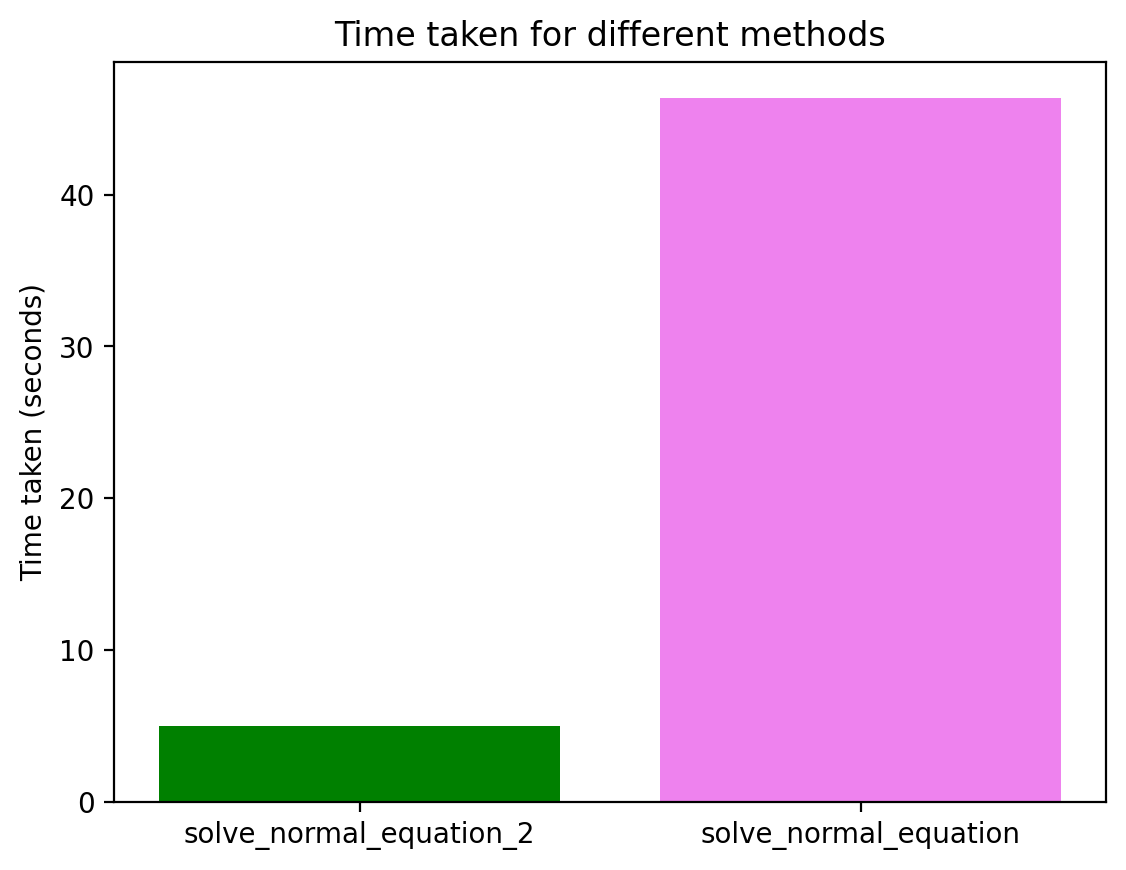

In [69]:
methods = ['solve_normal_equation_2', 'solve_normal_equation']
times = [time_taken_2, time_taken]

plt.bar(methods, times, color=['green', 'violet'])
plt.ylabel('Time taken (seconds)')
plt.title('Time taken for different methods')
plt.show()

#### np.lingalg.inv() computes the inverse of Z whereas np.lingalg.solve() does not compute the inverse of Z. It uses gesv (General Solve) in LAPACK (Linear Algebra Package) routine that factorizes Z using LU decomposition and then solves for theta. Whereas in np.lingalg.inv, after the LU decomposition, the inverse of the matrix is calculated. Since, calculation of inverse of a matrix is computationally expensive, it is not stable.
